In [1]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders


import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Path where our data is located

base_path = "C:/Users/Dell/Downloads/GSNSL/"

# Dictionary to save our 35 classes
categories = {  0: "क",
                1: "क्ष",
                2: "ख",
                3: "ग",
                4: "घ",
                5: "ङ",
                6: "च",
                7: "छ",
                8: "ज",
                9: "ज्ञ",
                10: "झ",
                11: "ञ",
                12: "ट",
                13: "ठ",
                14: "ड",
                15: "ढ",
                16: "ण",
                17: "त",
                18: "त्र",
                19: "थ",
                20: "द",
                21: "ध",
                22: "न",
                23: "प",
                24: "फ",
                25: "ब",
                26: "भ",
                27: "म",
                28: "य",
                29: "र",
                30: "ल",
                31: "व",
                32: "श",
                33: "ष",
                34: "स",
                35: "ह"
            }


def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# List containing all the filenames in the dataset
filenames_list = []
# List to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df

,filename,category
0,frame_12 - Copy.jpg,7
1,35 (20).jpg,16
2,35 (24).jpg,27
3,35 (107) - Copy.jpg,5
4,3 (18) - Copy.jpg,11
...,...,...
27005,36 (41) - Copy.jpg,3
27006,frame_12 - Copy (3).jpg,30
27007,1 (30) - Copy.jpg,14
27008,1 (80) - Copy.jpg,0


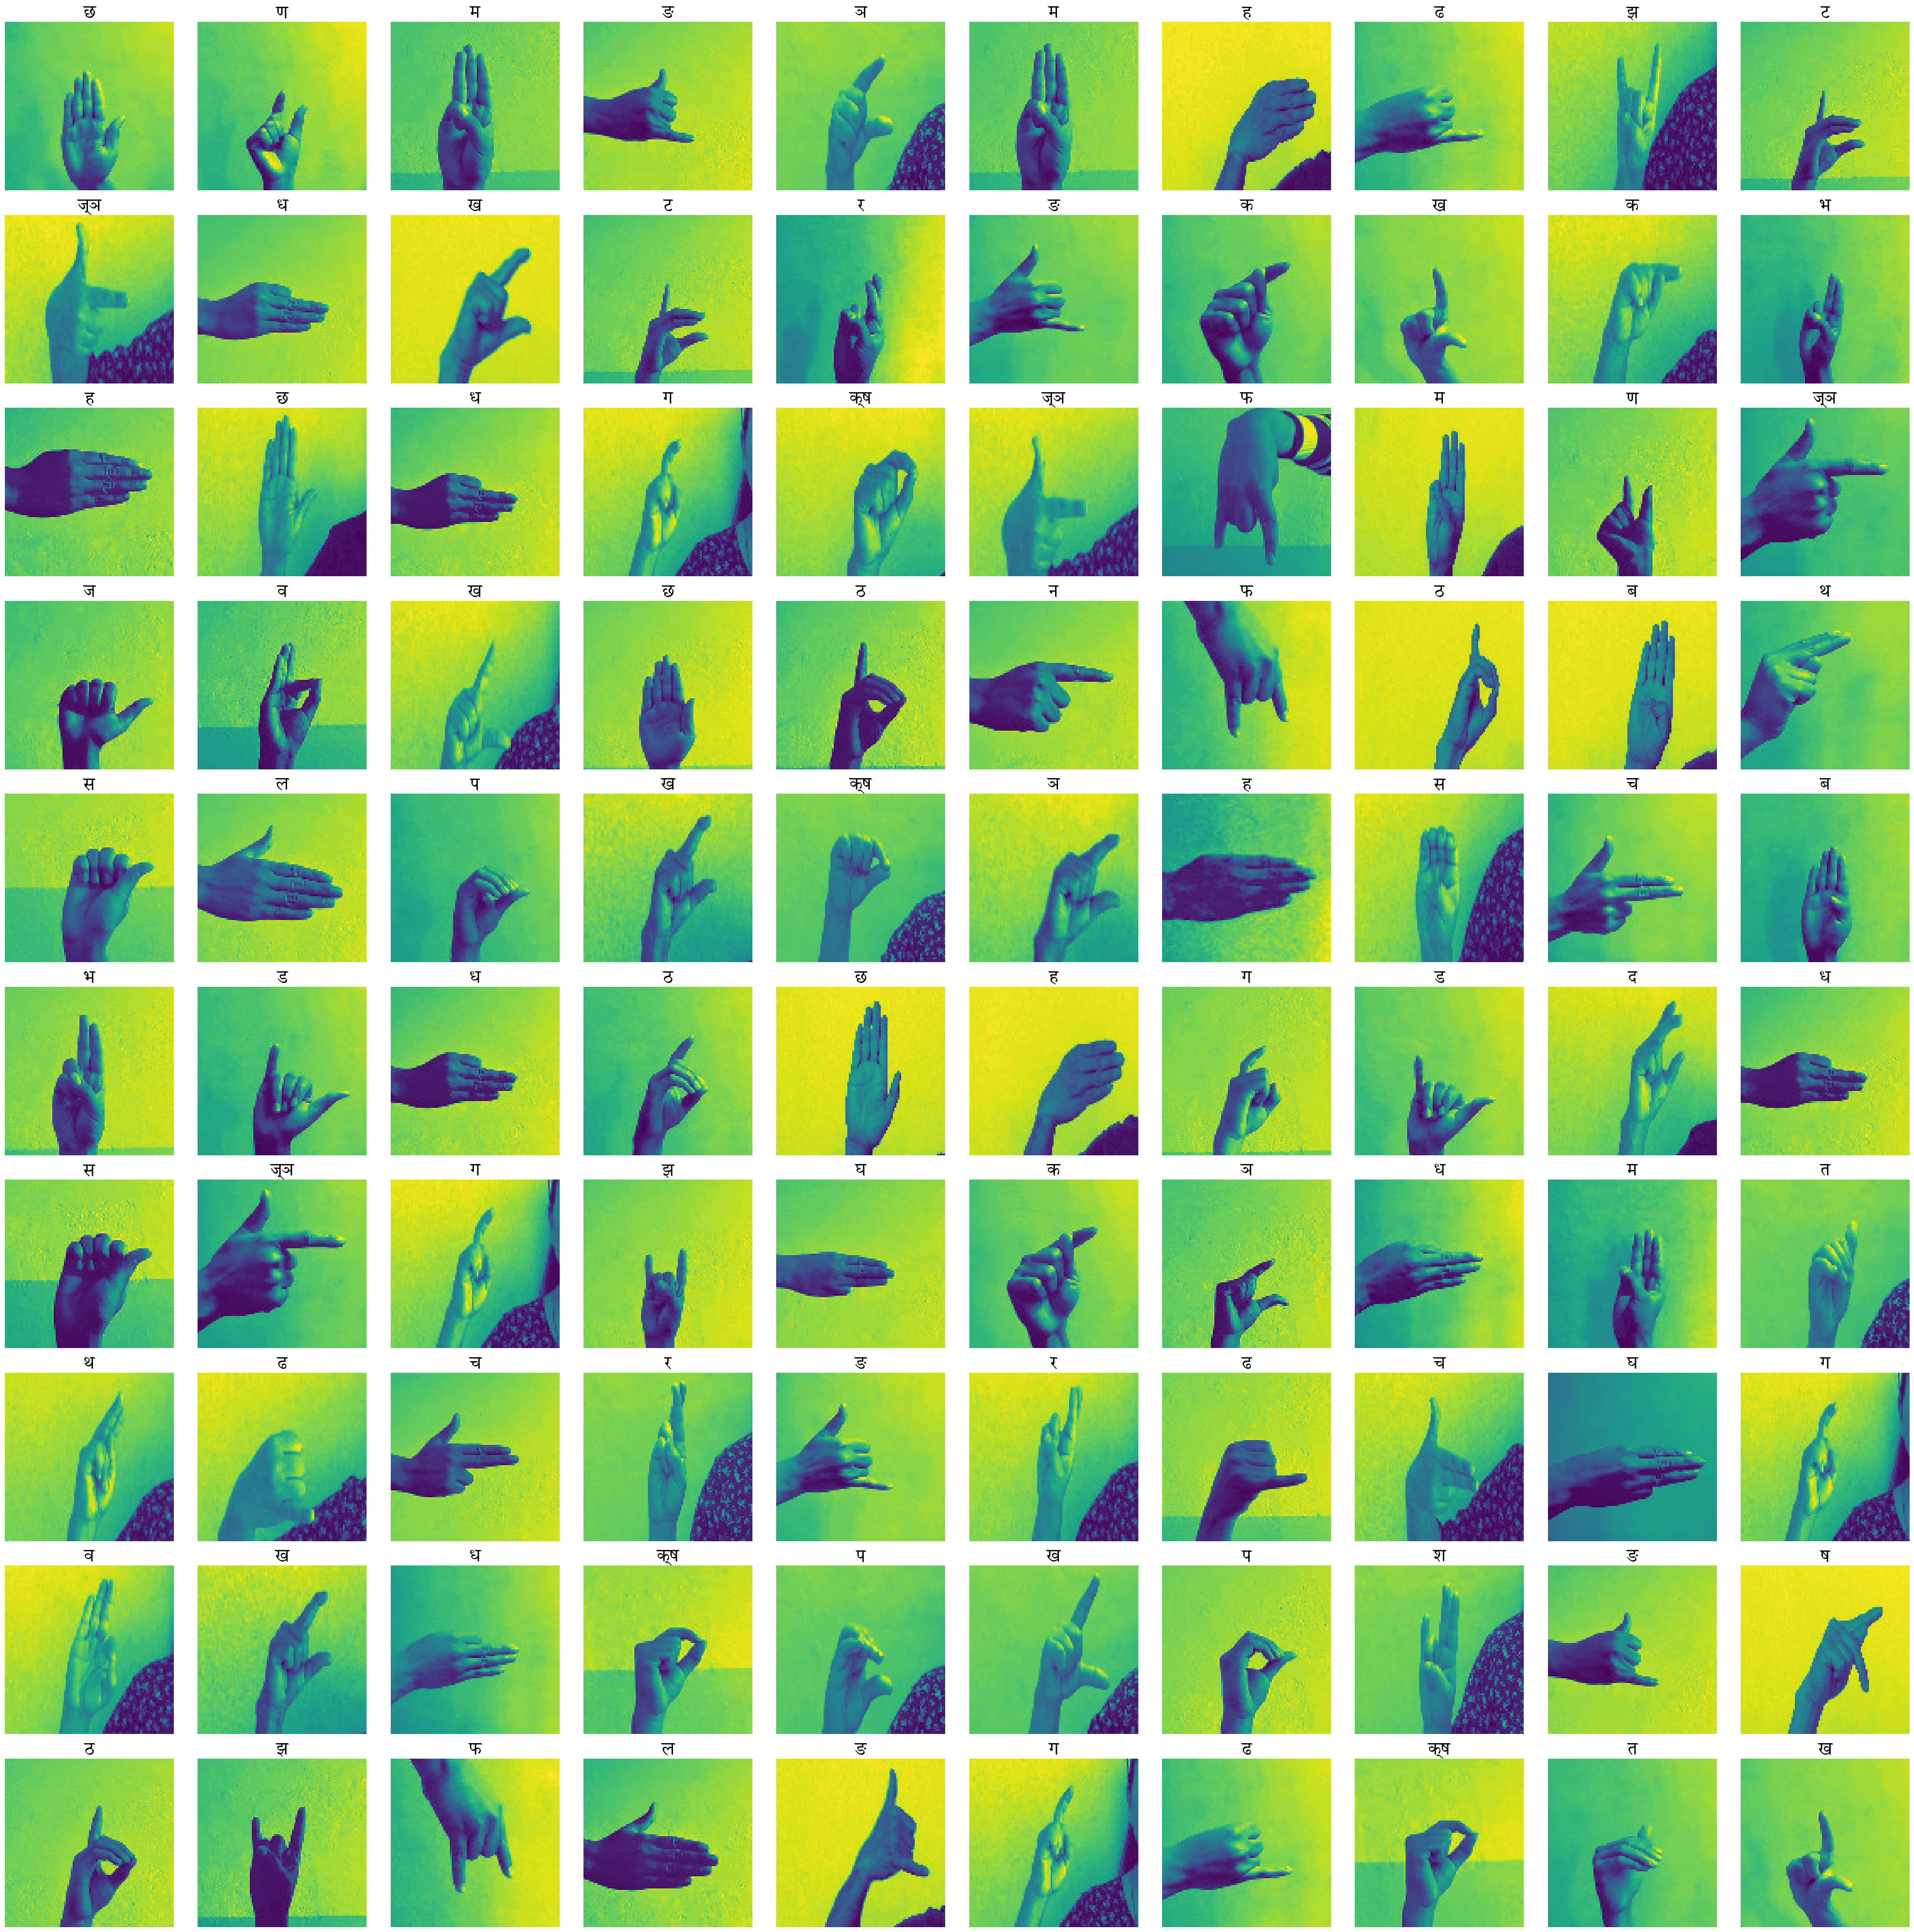

In [4]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import os

font_path = 'c:/Windows/Fonts/kokila.ttf'  # Replace with the actual file path of the Kokila font on your system
custom_font = FontProperties(fname=font_path, size=35)

plt.figure(figsize=(40, 40))

for i in range(100):
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10, 10, i + 1)

    # Title with custom 'Kokila' font for Nepali script
    plt.title(categories[df.category[i]], fontproperties=custom_font)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [11]:
splitfolders.ratio('C:/Users/Dell/Downloads/GSNSL/',output='C:/Users/Dell/Downloads/GSNSLdatasets/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 27010 files [02:17, 196.21 files/s]


In [5]:
datagen = ImageDataGenerator(rescale=1.0 / 255,
                            #  rotation_range=15,
                            #  width_shift_range=0.1,
                            #  height_shift_range=0.1,
                            #  shear_range=0.1,
                            #  zoom_range=0.1,
                            #  horizontal_flip=True,
                            #  fill_mode='nearest'
                             )


In [6]:
train_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/train/'
val_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/val/'
test_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/test/'

# Define hyperparameters and parameters
batch_size = 16
image_size = 100
img_channel = 1
num_classes = 36
learning_rate = 0.01


In [7]:
train_data = datagen.flow_from_directory(directory=train_path,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                         color_mode='grayscale',
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory=val_path,
                                       target_size=(image_size, image_size),
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='categorical')

test_data = datagen.flow_from_directory(directory=test_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='categorical',
                                        shuffle=False)

Found 21608 images belonging to 36 classes.
Found 2701 images belonging to 36 classes.
Found 2701 images belonging to 36 classes.


In [8]:
# # Define the CNN model
# model = Sequential()
# model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(image_size, image_size, img_channel)))
# model.add(Conv2D(64, 3, activation='relu', padding='same'))
# model.add(MaxPooling2D(padding='same'))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, 3, activation='relu', padding='same'))
# model.add(Conv2D(128, 3, activation='relu', padding='same'))
# model.add(MaxPooling2D(padding='same'))
# model.add(Dropout(0.3))

# model.add(Conv2D(256, 3, activation='relu', padding='same'))
# model.add(Conv2D(256, 3, activation='relu', padding='same'))
# model.add(MaxPooling2D(padding='same'))
# # model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.summary()
# # Define a simple CNN model for smaller images
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(36, activation='softmax'))

# model.summary()

def create_model():
    model = Sequential([
        Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=512, activation='relu'),
        Dropout(0.5),
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=36, activation='softmax')
    ])

    return model

In [9]:
model = create_model()

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 128)       0         
 g2D)                                                            
                                                        

In [11]:
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.6, verbose=1)


In [13]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=15,
                    callbacks=[early_stopping, reduce_learning_rate],
                    verbose=1)

Epoch 1/15
1351/1351 [==============================] - 698s 515ms/step - loss: 2.1478 - accuracy: 0.4395 - val_loss: 0.3023 - val_accuracy: 0.9541 - lr: 0.0100
Epoch 2/15
1351/1351 [==============================] - 698s 517ms/step - loss: 0.4496 - accuracy: 0.8668 - val_loss: 0.0364 - val_accuracy: 0.9911 - lr: 0.0100
Epoch 3/15
1351/1351 [==============================] - 694s 513ms/step - loss: 0.1908 - accuracy: 0.9428 - val_loss: 0.0090 - val_accuracy: 0.9967 - lr: 0.0100
Epoch 4/15
1351/1351 [==============================] - 696s 515ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.0100 - val_accuracy: 0.9967 - lr: 0.0100
Epoch 5/15
1351/1351 [==============================] - 715s 529ms/step - loss: 0.0795 - accuracy: 0.9747 - val_loss: 0.0046 - val_accuracy: 0.9974 - lr: 0.0100
Epoch 6/15
1351/1351 [==============================] - 668s 495ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0033 - val_accuracy: 0.9985 - lr: 0.0100
Epoch 7/15
1351/1351 [============

In [14]:
model.save('d7NSLmodel.h5')


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from keras.models import load_model
model = load_model('C:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/d33NSLmodel.h5')
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 98.73657822608948
The Loss of the model for training data is: 0.04918280616402626
The accuracy of the model for validation data is: 98.44502210617065
The Loss of the model for validation data is: 0.05248311534523964


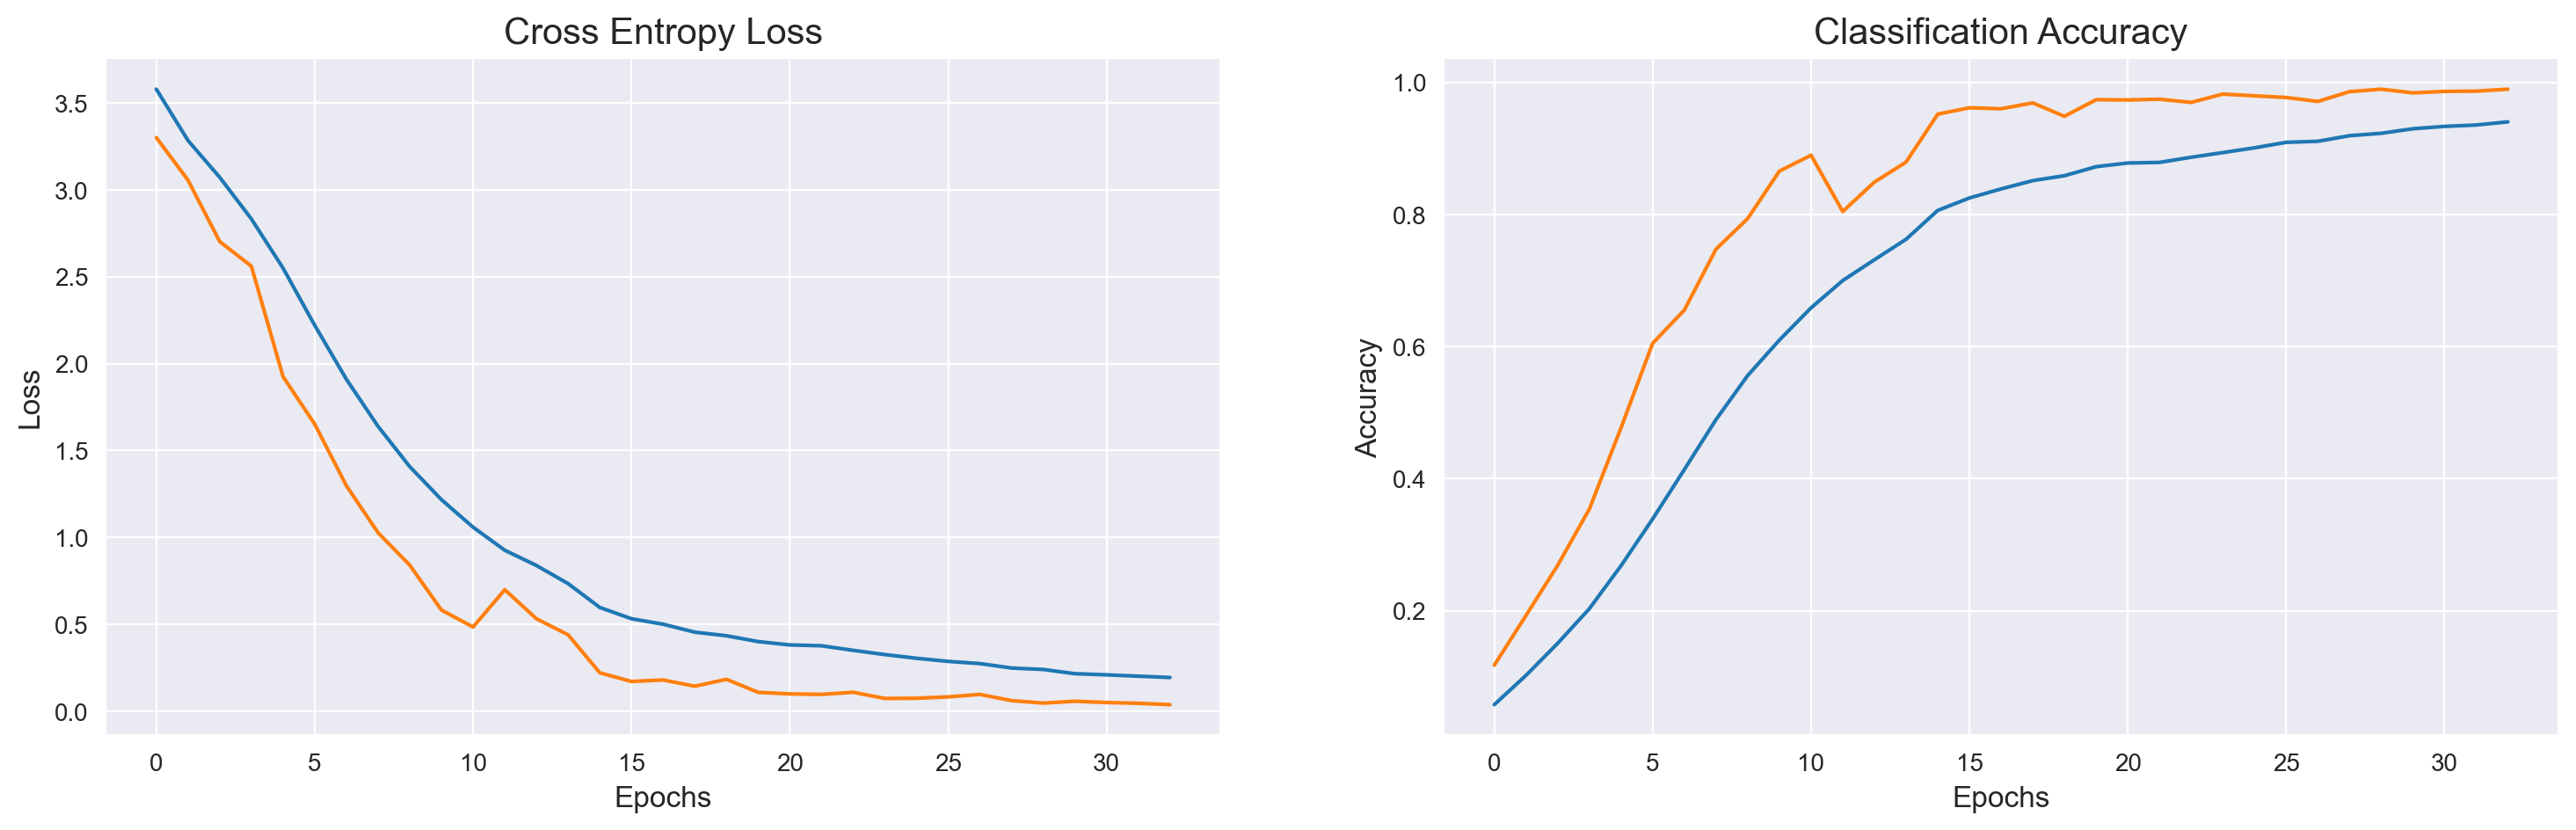

In [17]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [18]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 98.48204255104065
The Loss of the model for testing data is: 0.05223848298192024


In [19]:

p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 2671
Incorrect predicted classes: 30


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Pytho

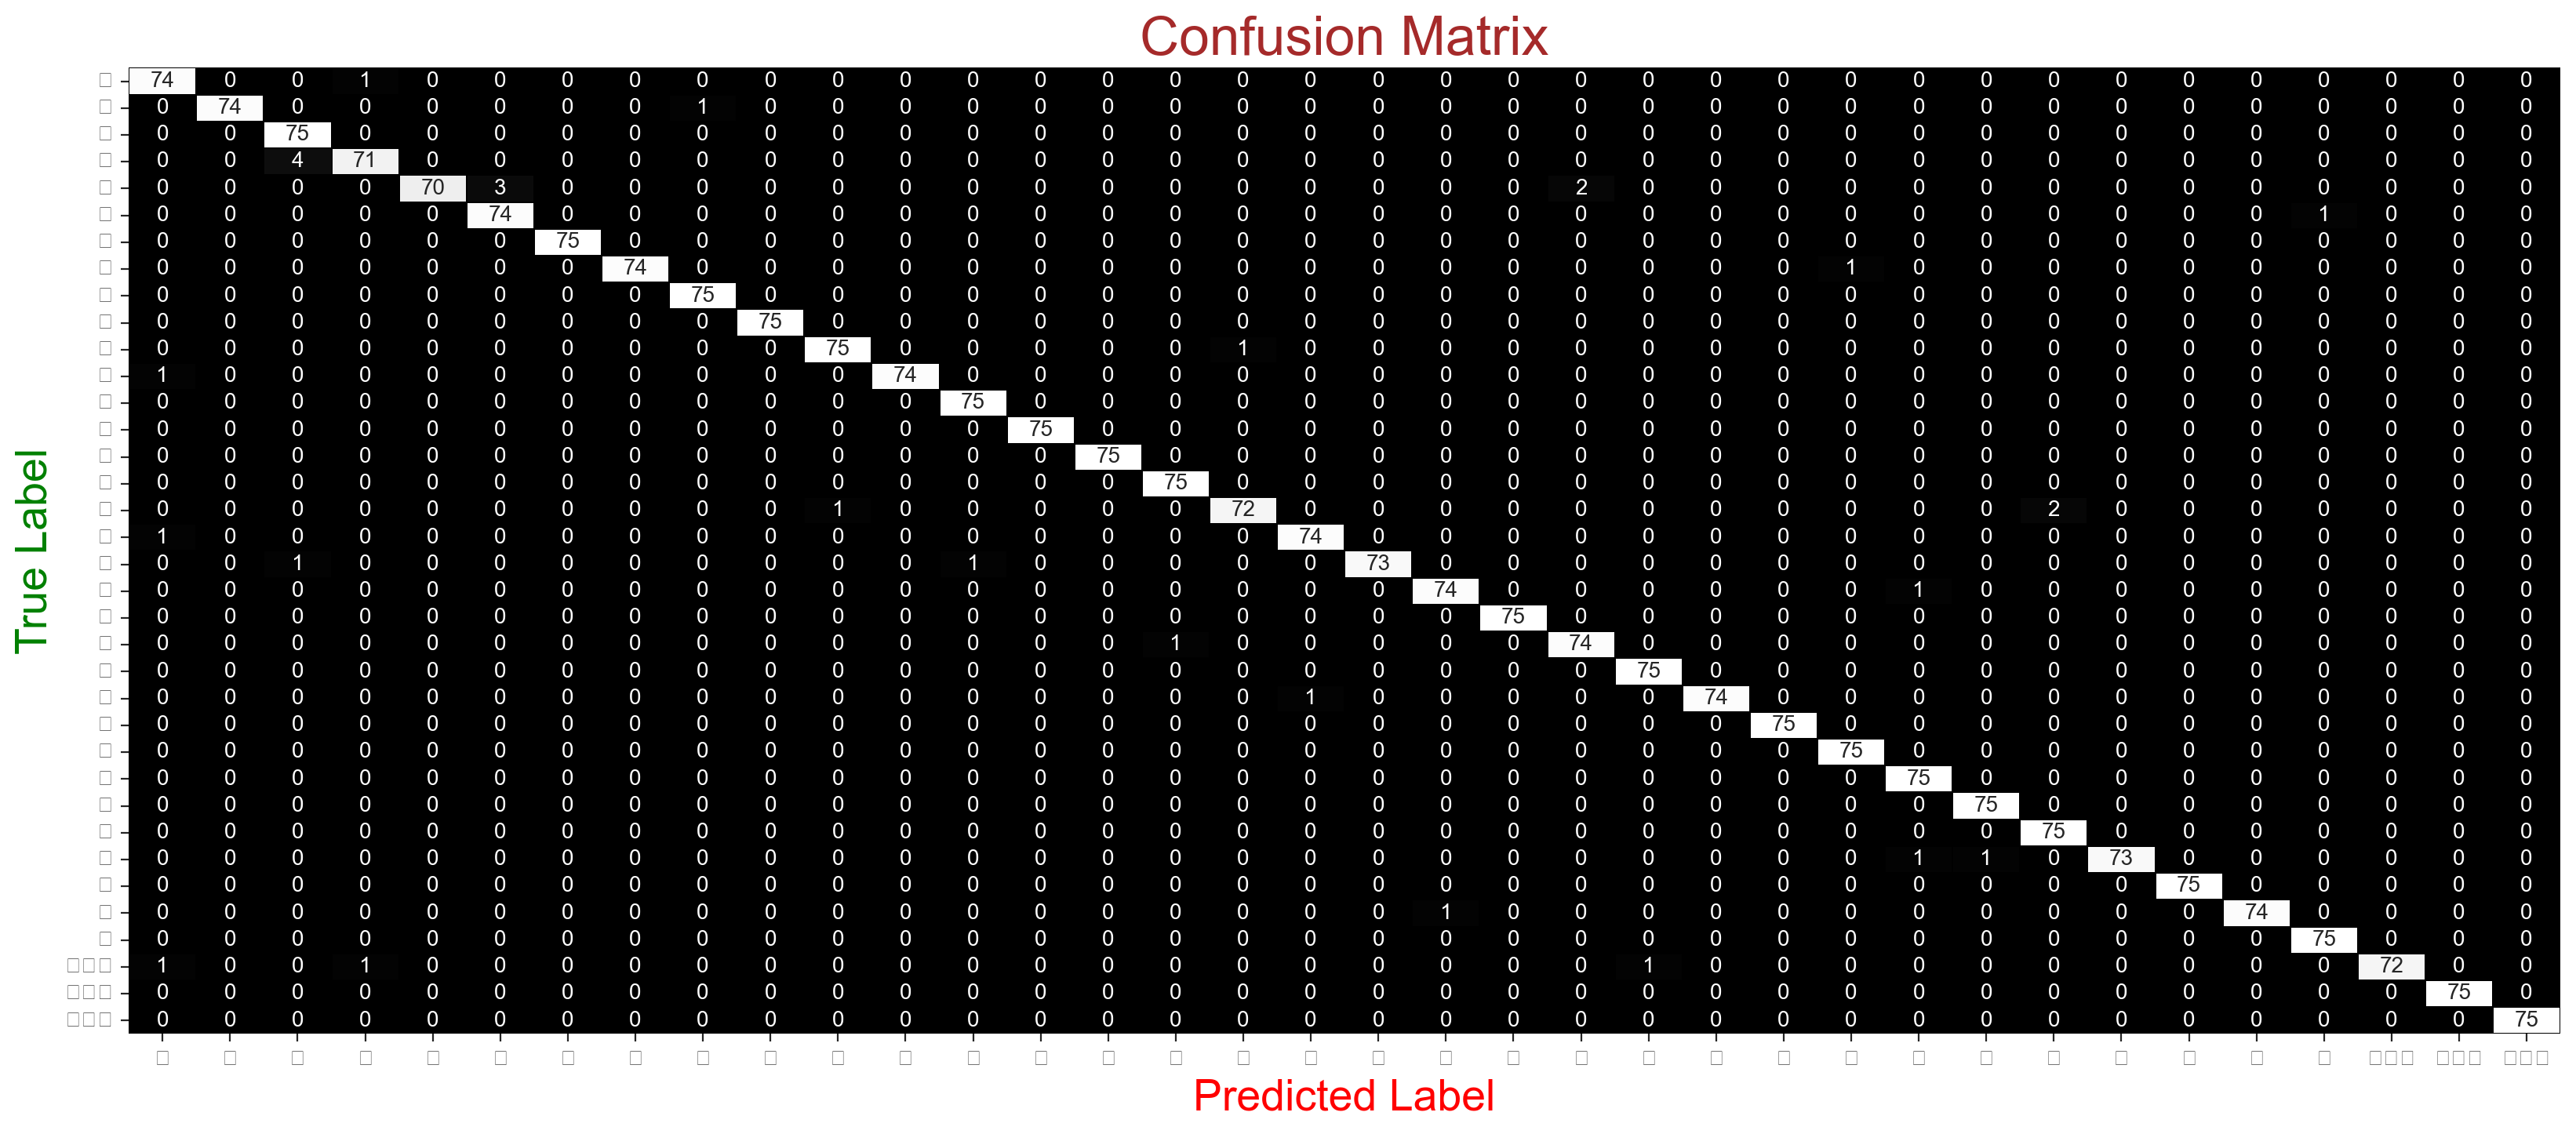

In [20]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.1, cmap = "gist_yarg_r", 
            linecolor="black", fmt='.0f', ax=ax, 
            cbar=False, xticklabels=categories.values(), 
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()








In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np

model = load_model('C:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/d33NSLmodel.h5')
labels = ["क","क्ष", "ख", "ग", "घ", "ङ", "च", "छ", "ज","ज्ञ", "झ", "ञ", "ट", "ठ", "ड", "ढ", "ण", "त", "त्र", "थ", "द", "ध", "न", "प", "फ", "ब", "भ", "म", "य", "र", "ल", "व", "श", "ष", "स", "ह"]

In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2  # OpenCV library for image processing

img_path = "C:/"  # Replace with your image path
img = image.load_img(img_path, color_mode='grayscale', target_size=(100, 100))  # Load image and convert to grayscale
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image data if necessary

predictions = model.predict(img_array)


1/1 [==============================] - 0s 72ms/step


In [42]:
predicted_class_index = np.argmax(predictions, axis=1)[0]
print(predicted_class_index)
# Get the class label associated with the predicted index
predicted_class_label = labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

19
Predicted class: थ
